# [자연어처리]
# 2주차(2-1) 텍스트 전처리

# 202002961 김현주
* 모든 셀 실행(Shift+Enter) 후 제출하시기 바랍니다.
* **실습 (2-1-1, 2-1-2)**이 있습니다.

## 1. 토큰화(Tokenization)

#### NLTK (https://www.nltk.org/) 설치

In [ ]:
# 필요한 nltk library download
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

### 1.1 문장 토큰화(sentence tokenize)

In [ ]:
para = "Hello everyone. It's good to see you. Let's start our NLP class!"

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(para)) #주어진 text를 sentence 단위로 tokenize함. 주로 . ! ? 등을 이용

['Hello everyone.', "It's good to see you.", "Let's start our NLP class!"]


### 1.2 단어 토큰화 (word tokenize)

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(para)) #주어진 text를 word 단위로 tokenize함

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'NLP', 'class', '!']


In [ ]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(para))

['Hello', 'everyone', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Let', "'", 's', 'start', 'our', 'NLP', 'class', '!']


# 2. 정제(Cleaning)

### 2.1 노이즈와 불용어 제거

In [ ]:
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

In [ ]:
print('불용어 개수 :', len(english_stops))
print('불용어 10개 출력 :', stopwords.words('english')[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
print(english_stops) #nltk가 제공하는 영어 stopword를 확인

{"aren't", 'here', 'too', 'any', 'than', "shan't", 'before', 'of', 'had', "it's", 'me', 'were', 'such', 'once', 'll', 'do', 'again', 'ours', "couldn't", 'wouldn', 'below', 'didn', 'them', 'so', "haven't", "weren't", 'above', 'myself', 'about', 'between', 'who', 'after', 'few', 'the', 'by', 'doing', 'that', 'themselves', 'if', 'should', 'hasn', 'all', "hasn't", 'what', 'in', 'himself', 'ourselves', 'wasn', 'through', 'those', 'up', 'until', 'yourself', 'why', 'couldn', 'to', 'most', 'own', 'he', "you'll", "doesn't", 'but', 'yourselves', 'shouldn', 'will', 'has', "she's", 'are', 'our', 'their', 'how', "isn't", 'she', "won't", "should've", 'there', 'does', 'whom', 'am', 'being', 'hers', 'same', 'i', "didn't", 'him', 'haven', 'then', 'herself', 'have', "that'll", 'from', 'other', "shouldn't", "mustn't", 'isn', 'on', 'at', 'm', 'each', 'they', 'o', 'down', "you'd", 'your', 'because', 'off', 'ma', 'not', 'weren', 'this', 'is', 'with', 'while', 'under', 'nor', 'mustn', 'been', 'doesn', 'its',

In [ ]:
text1 = "Sorry, I couldn't go to movie yesterday."
tokens = word_tokenize(text1.lower()) #word_tokenize로 토큰화
print(tokens)

['sorry', ',', 'i', 'could', "n't", 'go', 'to', 'movie', 'yesterday', '.']


In [ ]:
result = [word for word in tokens if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성
print(result)

['sorry', ',', 'could', "n't", 'go', 'movie', 'yesterday', '.']


In [ ]:
#자신만의 stopwords를 만들고 이용
#한글처리에서도 유용하게 사용할 수 있음
my_stopword = ['i', 'go', 'to'] # 나만의 stopword를 리스트로 정의
result = [word for word in tokens if word not in my_stopword]
print(result)

['sorry', ',', 'could', "n't", 'movie', 'yesterday', '.']


# 3. 정규화(Normalization)
## 3.1 어간 추출(Stemming)

In [ ]:
from nltk.stem import PorterStemmer #포터 스테머 알고리즘
stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookeri cookbook


In [ ]:
from nltk.tokenize import word_tokenize

para = "Hello everyone. It's good to see you. Let's start our Natural Langage Processing class!"
tokens = word_tokenize(para) #토큰화 실행
print(tokens)
result = [stemmer.stem(token) for token in tokens] #모든 토큰에 대해 스테밍 실행
print(result)

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'Natural', 'Langage', 'Processing', 'class', '!']
['hello', 'everyon', '.', 'it', "'s", 'good', 'to', 'see', 'you', '.', 'let', "'s", 'start', 'our', 'natur', 'langag', 'process', 'class', '!']


In [ ]:
from nltk.stem import LancasterStemmer #랭카스터 스테머 알고리즘
stemmer = LancasterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookery cookbook


## 3.2 표제어 추출(Lemmatization)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
#comparison of lemmatizing and stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print('stemming result:', stemmer.stem('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes', pos='v'))

stemming result: believ
lemmatizing result: belief
lemmatizing result: believe


In [ ]:
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos='v')) #품사를 지정
print(lemmatizer.lemmatize('cookery'))
print(lemmatizer.lemmatize('cookbooks'))

cooking
cook
cookery
cookbook


---

# **[[실습 2-1-1]]** 어간 추출(Stemming)과 표제어 추출(Lemmatization)의 차이점은?


*   어간 추출과 표제어 추출의 차이점을 보일 수 있는 예시를 들고, 둘의 차이점이 무엇인지 분석해 보시오.
  * **아래와 같이 실행하면 되고, 'believes' 부분을 변경해 보시면 되겠습니다.**

[참고]
```
print('stemming result:', stemmer.stem('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes'))
```





In [ ]:
# 실습 코드 작성 (Shift+Enter를 이용해 코드 실행)
print('stemming result:', stemmer.stem('preprocesses'))
print('lemmatizing result:', lemmatizer.lemmatize('preprocesses'))

stemming result: preprocess
lemmatizing result: preprocesses


# 어떤 차이점이 있는 것 같은지 정리해 보세요.
# (아래의 텍스트 셀을 더블 클릭하여 수정 후, Shift+Enter)

* 차이점: 어간 추출은 단어가 변형되는 규칙을 이용해 단어의 어간을 분리하는 경향이 있고, 표제어 추출은 단어의 기본형으로 변환하기 위해 사전에 나오는 단어로 반환하는 경향이 있는 것 같다.
  * 어간 추출(stemming) 결과: preprocesses -> preprocess
  * 표제어 추출(lemmatization) 결과: preprocesses -> preprocesses

---

# 4. 품사 태깅(Part-of-Speech Tagging)

## 4.1 NLTK를 이용한 품사 태깅

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize("Hello everyone. It's good to see you. Let's start our NLP class!")
print(nltk.pos_tag(tokens))

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('NLP', 'NNP'), ('class', 'NN'), ('!', '.')]


In [ ]:
nltk.help.upenn_tagset('CC')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [ ]:
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'class']


## 4.2 한글 형태소 분석과 품사 태깅

In [ ]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

In [ ]:
tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


### KoNLPy 설치

https://konlpy.org/ko/latest/install/

In [ ]:
! pip install konlpy

In [ ]:
from konlpy.tag import Okt
t = Okt()

In [ ]:
print('형태소:', t.morphs(sentence))
print()
print('명사:', t.nouns(sentence))
print()
print('품사 태깅 결과:', t.pos(sentence))

형태소: ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']

명사: ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']

품사 태깅 결과: [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상

---

# **[[실습2-1-2]]** 형태소 분석기 비교: Okt vs Komoran
* **아래와 같이, Okt 자리에 Komoran을 입력해 보세요.**


```
from konlpy.tag import Komoran
k = Komoran()
```
```
print('형태소:', k.morphs(sentence))
print()
print('명사:', k.nouns(sentence))
print()
print('품사 태깅 결과:', k.pos(sentence))
```
그리고, Okt와 Komoran의 결과를 비교해 보세요.




In [ ]:
# 실습 코드 작성 (Shift+Enter를 이용해 코드 실행)
from konlpy.tag import Komoran
k = Komoran()

In [ ]:
print('형태소:', k.morphs(sentence))
print()
print('명사:', k.nouns(sentence))
print()
print('품사 태깅 결과:', k.pos(sentence))

형태소: ['절망', '의', '반대', '가', '희망', '은', '아니', '다', '.', '어둡', 'ㄴ', '밤하늘', '에', '별', '이', '빛나', '듯', '희망', '은', '절망', '속', '에', '싹트', '는', '거지', '만약', '에', '우리', '가', '희망', '하', 'ㅁ', '이', '적', '다면', '그', '누구', '가', '세상', '을', '비추', 'ㄹ', '어', '주', 'ㄹ까', '.', '정희성', ',', '희망', '공부']

명사: ['절망', '반대', '희망', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '희망', '세상', '정희성', '희망', '공부']

품사 태깅 결과: [('절망', 'NNG'), ('의', 'JKG'), ('반대', 'NNG'), ('가', 'JKS'), ('희망', 'NNG'), ('은', 'JX'), ('아니', 'VCN'), ('다', 'EF'), ('.', 'SF'), ('어둡', 'VA'), ('ㄴ', 'ETM'), ('밤하늘', 'NNP'), ('에', 'JKB'), ('별', 'NNG'), ('이', 'JKS'), ('빛나', 'VV'), ('듯', 'EC'), ('희망', 'NNG'), ('은', 'JX'), ('절망', 'NNG'), ('속', 'NNG'), ('에', 'JKB'), ('싹트', 'VV'), ('는', 'ETM'), ('거지', 'NNG'), ('만약', 'NNG'), ('에', 'JKB'), ('우리', 'NP'), ('가', 'JKS'), ('희망', 'NNG'), ('하', 'XSV'), ('ㅁ', 'ETN'), ('이', 'JKS'), ('적', 'VA'), ('다면', 'EC'), ('그', 'MM'), ('누구', 'NP'), ('가', 'JKS'), ('세상', 'NNG'), ('을', 'JKO'), ('비추', 'VV'), ('ㄹ', 'ETM'), ('어', 'EC'), ('주', 

# 동일한 입력 문장(sentence)에 대한 결과를 비교해 보시기 바랍니다.
# (아래의 텍스트 셀을 더블 클릭하여 수정 후, Shift+Enter)

* 형태소 결과 비교: Okt는 텍스트를 덩어리로 처리하는 경향이 있는 것 같고, Komoran은 '아니다'를 '아니'와 '다'로 분리하는 모습을 보아 어미나 접사 등 더 세밀한 분리와 분석을 수행하는 경향이 있는 것 같다.
  * Okt 결과: ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']
  * Komoran 결과: ['절망', '의', '반대', '가', '희망', '은', '아니', '다', '.', '어둡', 'ㄴ', '밤하늘', '에', '별', '이', '빛나', '듯', '희망', '은', '절망', '속', '에', '싹트', '는', '거지', '만약', '에', '우리', '가', '희망', '하', 'ㅁ', '이', '적', '다면', '그', '누구', '가', '세상', '을', '비추', 'ㄹ', '어', '주', 'ㄹ까', '.', '정희성', ',', '희망', '공부']
* 명사 결과 비교: Okt는 '우리'를 명사로 반환한 것을 보아 대명사도 명사로 분리하며 '어'와 '두운'를 통해 비교적 넓은 범위의 단어를 명사로 처리하는 경향을 보이는 것 같고, Komoran은 비교적 더 정확하게 명사를 반환하는 것 같다.
  * Okt 결과: ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']
  * Komoran 결과: ['절망', '반대', '희망', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '희망', '세상', '정희성', '희망', '공부']
* 품사 태깅 결과 비교: Okt는 'Noun'과 'Josa'와 같이 한글의 품사를 영어 발음으로 풀어쓴 형태로 표현하는 것 같고, Komoran은 nltk를 이용해 품사 태깅을 한 형태로 반환하는 것 같다.
  * Okt 결과: [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 'Noun'), ('을', 'Josa'), ('비출어줄까', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('정희성', 'Noun'), (',', 'Punctuation'), ('희망', 'Noun'), ('공부', 'Noun')]
  * Komoran 결과: [('절망', 'NNG'), ('의', 'JKG'), ('반대', 'NNG'), ('가', 'JKS'), ('희망', 'NNG'), ('은', 'JX'), ('아니', 'VCN'), ('다', 'EF'), ('.', 'SF'), ('어둡', 'VA'), ('ㄴ', 'ETM'), ('밤하늘', 'NNP'), ('에', 'JKB'), ('별', 'NNG'), ('이', 'JKS'), ('빛나', 'VV'), ('듯', 'EC'), ('희망', 'NNG'), ('은', 'JX'), ('절망', 'NNG'), ('속', 'NNG'), ('에', 'JKB'), ('싹트', 'VV'), ('는', 'ETM'), ('거지', 'NNG'), ('만약', 'NNG'), ('에', 'JKB'), ('우리', 'NP'), ('가', 'JKS'), ('희망', 'NNG'), ('하', 'XSV'), ('ㅁ', 'ETN'), ('이', 'JKS'), ('적', 'VA'), ('다면', 'EC'), ('그', 'MM'), ('누구', 'NP'), ('가', 'JKS'), ('세상', 'NNG'), ('을', 'JKO'), ('비추', 'VV'), ('ㄹ', 'ETM'), ('어', 'EC'), ('주', 'VX'), ('ㄹ까', 'EF'), ('.', 'SF'), ('정희성', 'NNP'), (',', 'SP'), ('희망', 'NNG'), ('공부', 'NNG')]

---

# 제출 방법: [파일] -> [다운로드] -> [.ipynb 다운로드] 후, **.ipynb 파일을 LMS에 제출**

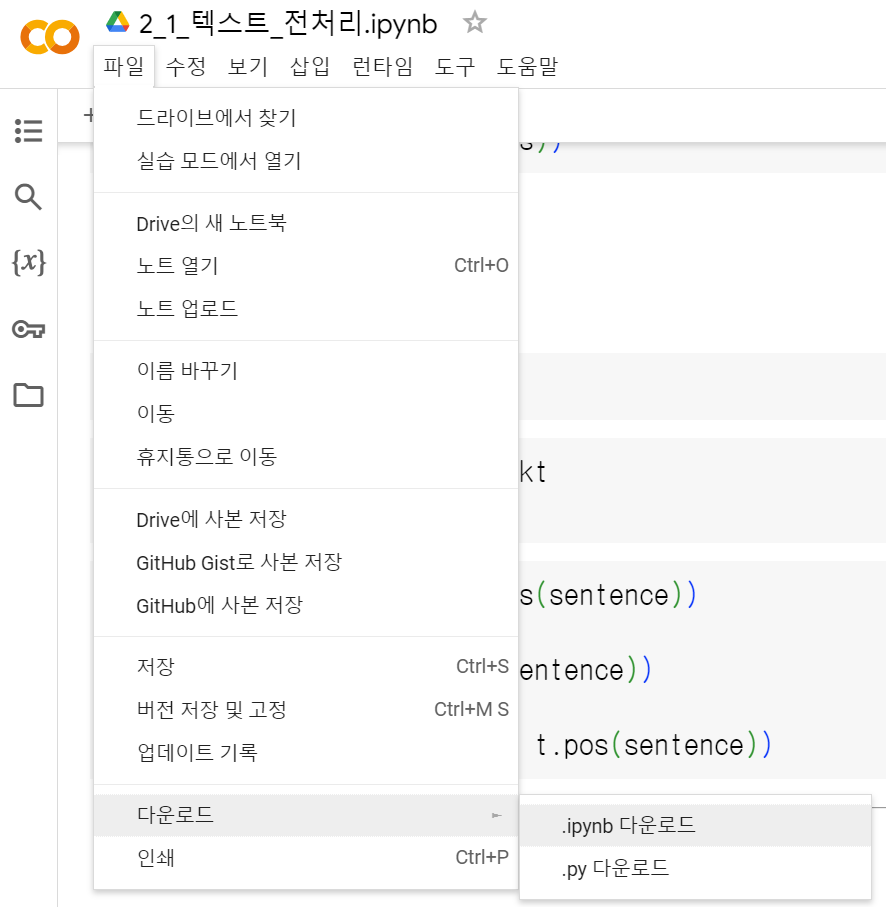